## Import pandas library and read in the data

In [700]:
import pandas as pd 

df = pd.read_csv('./dataset/showwcase_sessions.csv')
df 

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data pre-processing

### We need to check the dataset to see if any column contains a negative value. There should be no negative values because it does not make sense to say that a given customer added -1 projects or gave -1 likes during their session

### If a negative value exists, lets replace it with 0 

In [701]:
#Check if value is less than 0. If it is, replace it with 0

threshold = df._get_numeric_data()
threshold[threshold < 0] = 0
df

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove records from the dataset where columns are NaN

In [702]:
#Drop records from dataset where all columns are NaN 
df = df.dropna()

# See initial statistics of the columns in the dataframe

In [703]:
df.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,529534.652174,45028.849498,1.618729,10.458194,2.408027,731.638796,1.237458,1190.414716
std,280232.153769,26426.038013,1.336799,9.474839,2.251190,839.247660,1.759100,686.871418
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,307856.000000,23579.000000,1.000000,0.000000,0.500000,0.000000,0.000000,614.000000
50%,552796.000000,39475.000000,2.000000,9.000000,2.000000,312.000000,0.000000,1152.000000
75%,802738.000000,73245.000000,3.000000,19.000000,4.000000,1525.500000,2.500000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


# Let's add the day of week to get a better understanding of the data

In [704]:
import warnings
warnings.filterwarnings("ignore")

df['login_date'] = pd.to_datetime(df['login_date'])

df['day_of_week'] = df['login_date'].dt.day_name()
df

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,day_of_week
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,Wednesday
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,Wednesday
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,Wednesday
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,Wednesday
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,2019-10-01,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0,Tuesday
296,558332.0,87323.0,2019-10-01,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0,Tuesday
297,643880.0,51243.0,2019-10-01,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0,Tuesday
298,844518.0,23083.0,2019-10-01,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0,Tuesday


# Time Series Analysis

## Let's analyze the average session duration of the dataframe by grouping the data according to login date

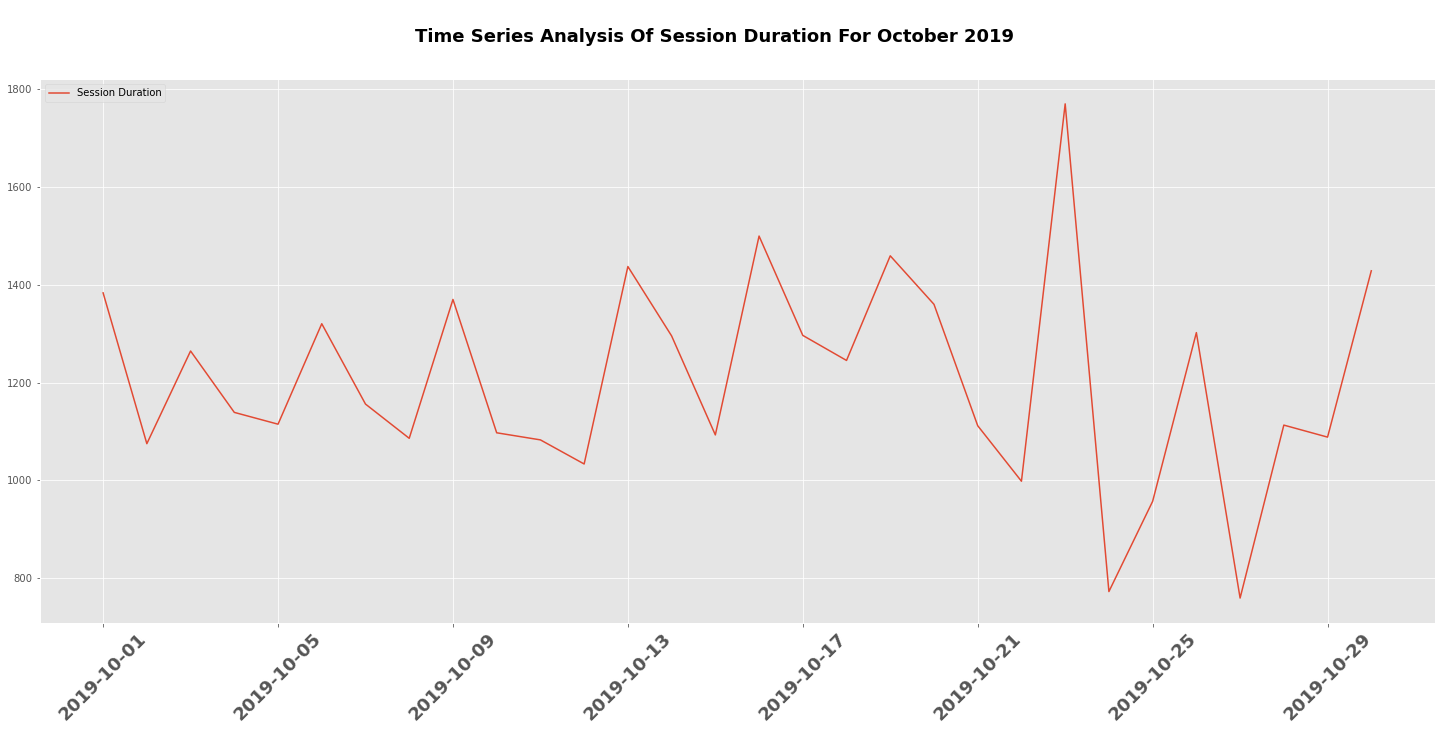

In [705]:
import matplotlib.pyplot as plt

time_series = df.groupby(['login_date']).mean()

def visualize_sessionDuration(df, title):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(25,10))
        plt.plot(df['session_duration'], label='Session Duration')
        plt.suptitle(title,fontweight="bold",fontsize=18)
        plt.xticks(rotation=45,fontweight="bold",fontsize=18)
        plt.legend(loc=2)

visualize_sessionDuration(time_series,"\nTime Series Analysis Of Session Duration For October 2019")

# Add the day of the week column to the dataframe to understand trends by weekday and weekend 

In [706]:
df['login_date'] = pd.to_datetime(df['login_date'])

df['day_of_week'] = df['login_date'].dt.day_name()
df

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,day_of_week
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,Wednesday
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,Wednesday
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,Wednesday
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,Wednesday
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,2019-10-01,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0,Tuesday
296,558332.0,87323.0,2019-10-01,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0,Tuesday
297,643880.0,51243.0,2019-10-01,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0,Tuesday
298,844518.0,23083.0,2019-10-01,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0,Tuesday


### Get statistics by day of week

In [707]:
#Analyze by day of week 

from pandas.api.types import CategoricalDtype
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)

day = df.groupby(['day_of_week']).mean()
day

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
day_of_week,,,,,,,,
Sunday,472120.404762,53642.714286,1.571429,11.142857,2.595238,834.023810,2.142857,1268.738095
Monday,498936.463415,45035.146341,1.487805,12.073171,2.439024,704.707317,1.000000,1139.512195
Tuesday,534895.857143,42003.244898,1.571429,8.979592,2.000000,774.816327,1.183673,1123.244898
Wednesday,557132.562500,46231.843750,2.125000,8.875000,2.843750,878.031250,1.093750,1406.468750
Thursday,456198.658537,45652.219512,1.682927,7.902439,2.707317,745.390244,1.268293,1067.341463
Friday,614100.300000,40723.550000,1.375000,11.550000,2.225000,559.500000,0.475000,1121.250000
Saturday,569242.833333,43072.777778,1.629630,12.111111,2.259259,663.592593,1.388889,1245.740741


# Let's see the user activity by day of week

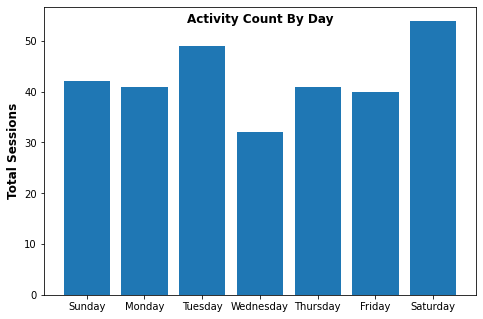

In [708]:
dailyCount = df.groupby(['day_of_week']).count()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.suptitle("Activity Count By Day\n",fontweight="bold",fontsize=12)
dayOfWeek = dailyCount.index
sessionID = dailyCount['session_id']
ax.bar(dayOfWeek,sessionID)
plt.ylabel('Total Sessions',fontweight="bold",fontsize=12)
plt.show()

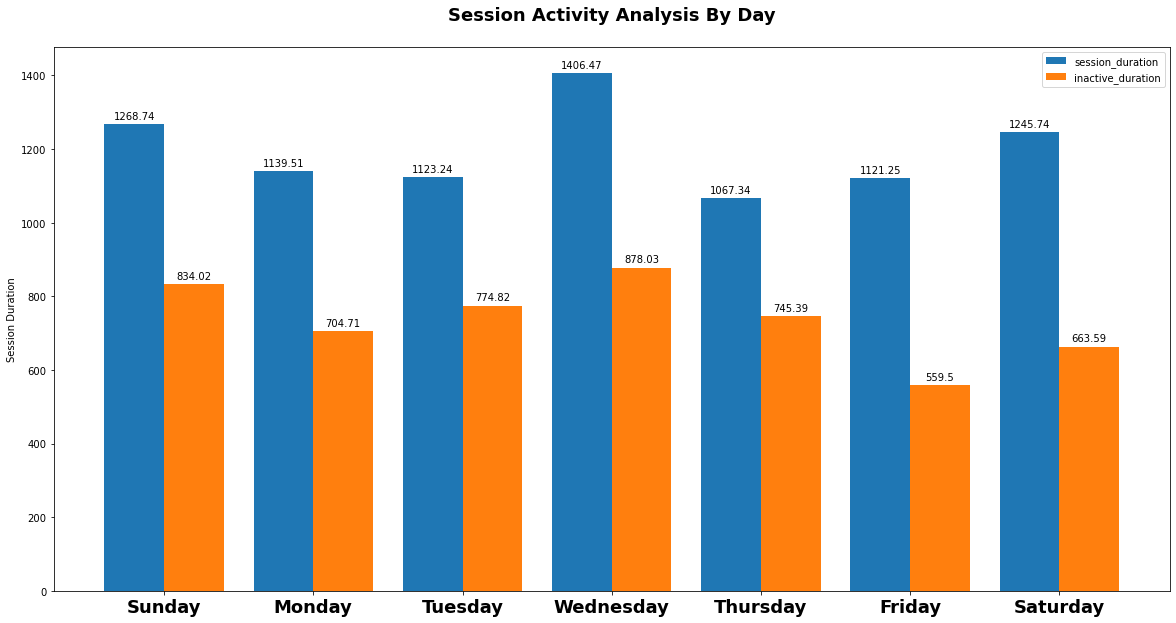

In [709]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def byDay(df,splice, metric):
    
    labels = day.index
    analysis = df[splice]
    counter_analysis = df[metric]

    x = np.arange(len(labels))  
    width = 0.40  

    fig, ax = plt.subplots(figsize=(20, 10))
    rects1 = ax.bar(x - width/2, round(analysis,2), width, label=splice)
    rects2 = ax.bar(x + width/2, round(counter_analysis,2), width, label=metric)

    ax.set_ylabel('Session Duration')
    ax.set_title('Session Activity Analysis By Day\n',fontweight="bold",fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontweight="bold",fontsize=18)
    ax.legend()


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)


    plt.show()
    
byDay(day,'session_duration','inactive_duration')

In [710]:
#Analyze by day of week 

from pandas.api.types import CategoricalDtype
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)

day = df.groupby(['day_of_week']).mean()
day

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
day_of_week,,,,,,,,
Sunday,472120.404762,53642.714286,1.571429,11.142857,2.595238,834.023810,2.142857,1268.738095
Monday,498936.463415,45035.146341,1.487805,12.073171,2.439024,704.707317,1.000000,1139.512195
Tuesday,534895.857143,42003.244898,1.571429,8.979592,2.000000,774.816327,1.183673,1123.244898
Wednesday,557132.562500,46231.843750,2.125000,8.875000,2.843750,878.031250,1.093750,1406.468750
Thursday,456198.658537,45652.219512,1.682927,7.902439,2.707317,745.390244,1.268293,1067.341463
Friday,614100.300000,40723.550000,1.375000,11.550000,2.225000,559.500000,0.475000,1121.250000
Saturday,569242.833333,43072.777778,1.629630,12.111111,2.259259,663.592593,1.388889,1245.740741


# Visualize the interactions with respect to the login date

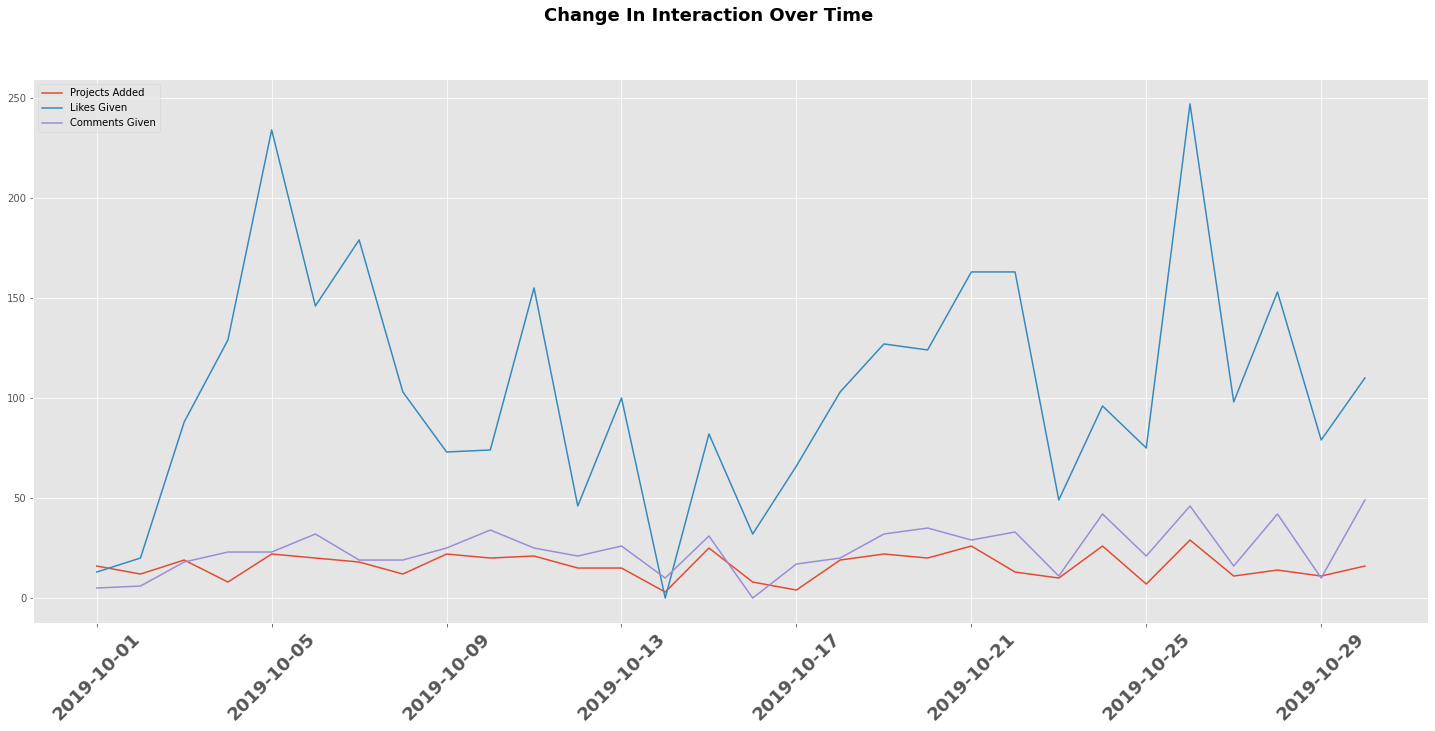

In [711]:
interaction = df.groupby('login_date').sum()


def interactionAnalysis(df, title):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(25,10))
        plt.plot(df['session_projects_added'], label='Projects Added')
        plt.plot(df['session_likes_given'], label='Likes Given')
        plt.plot(df['session_comments_given'], label='Comments Given')
        plt.suptitle(title,fontweight="bold",fontsize=18)
        plt.xticks(rotation=45,fontweight="bold",fontsize=18)
        plt.legend(loc=2)

interactionAnalysis(interaction, "Change In Interaction Over Time")

## Let's get a sense of what type of interactions are occurring with respect to the day of the week.

## Then try to understand if the day somehow affects the type of user interaction

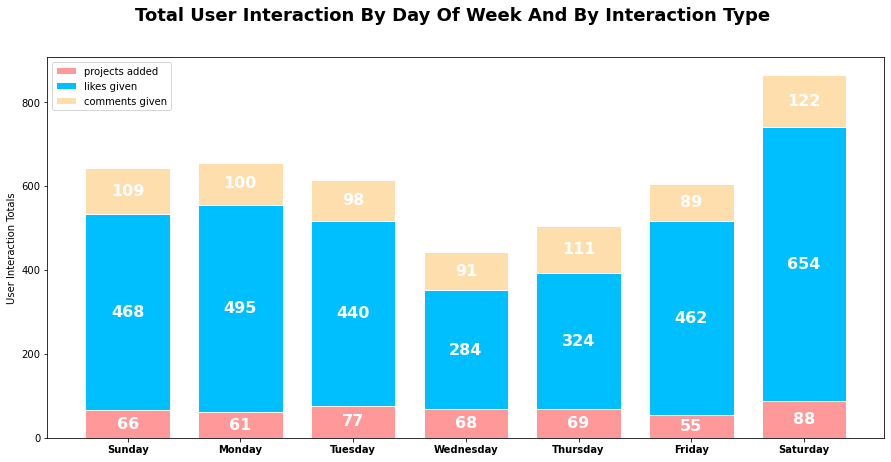

In [712]:
dailyInteraction = df.groupby(['day_of_week']).sum()

quarter = dailyInteraction.index
projects = dailyInteraction['session_projects_added']
likes =  dailyInteraction['session_likes_given']
comments = dailyInteraction['session_comments_given']
    
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
r = range(len(quarter))
barWidth = .75


plt.figure(figsize=(15,7))
plt.suptitle("Total User Interaction By Day Of Week And By Interaction Type",fontweight="bold",fontsize=18)
ax1 = plt.bar(r, projects, color=colors[0], edgecolor='white', width=barWidth, label="projects added")
ax2 = plt.bar(r, likes, bottom=np.array(projects), color=colors[1], edgecolor='white', width=barWidth, label='likes given')
ax3 = plt.bar(r, comments, bottom=np.array(projects)+np.array(likes), color=colors[4], edgecolor='white', width=barWidth, label='comments given')
plt.legend()


plt.xticks(r, quarter, fontweight='bold')
plt.ylabel("User Interaction Totals")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")

plt.show()

## Let's identify the top 15 users by counting their customer id

					TOTAL SESSIONS OF TOP 15 USERS BY CUSTOMER ID


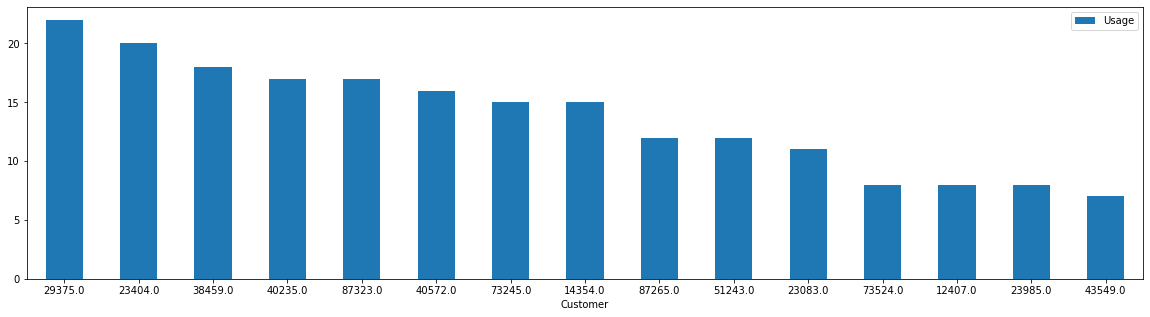

In [713]:
#Analyze the top 10 customers 

most_frequent_customers = df['customer_id'].value_counts().head(15)
frequency = pd.DataFrame({'Customer':most_frequent_customers.index, 'Usage':most_frequent_customers.values})
print('\t\t\t\t\tTOTAL SESSIONS OF TOP 15 USERS BY CUSTOMER ID')
bar = frequency.plot.bar(x='Customer', y='Usage', rot=0,figsize=(20,5))

## Analyze the duration of each session as well as the inactive sessions

# Notice how the inactive duration line overtakes the session duration line on the right side of the graph (between Oct. 25 and Oct. 29). 

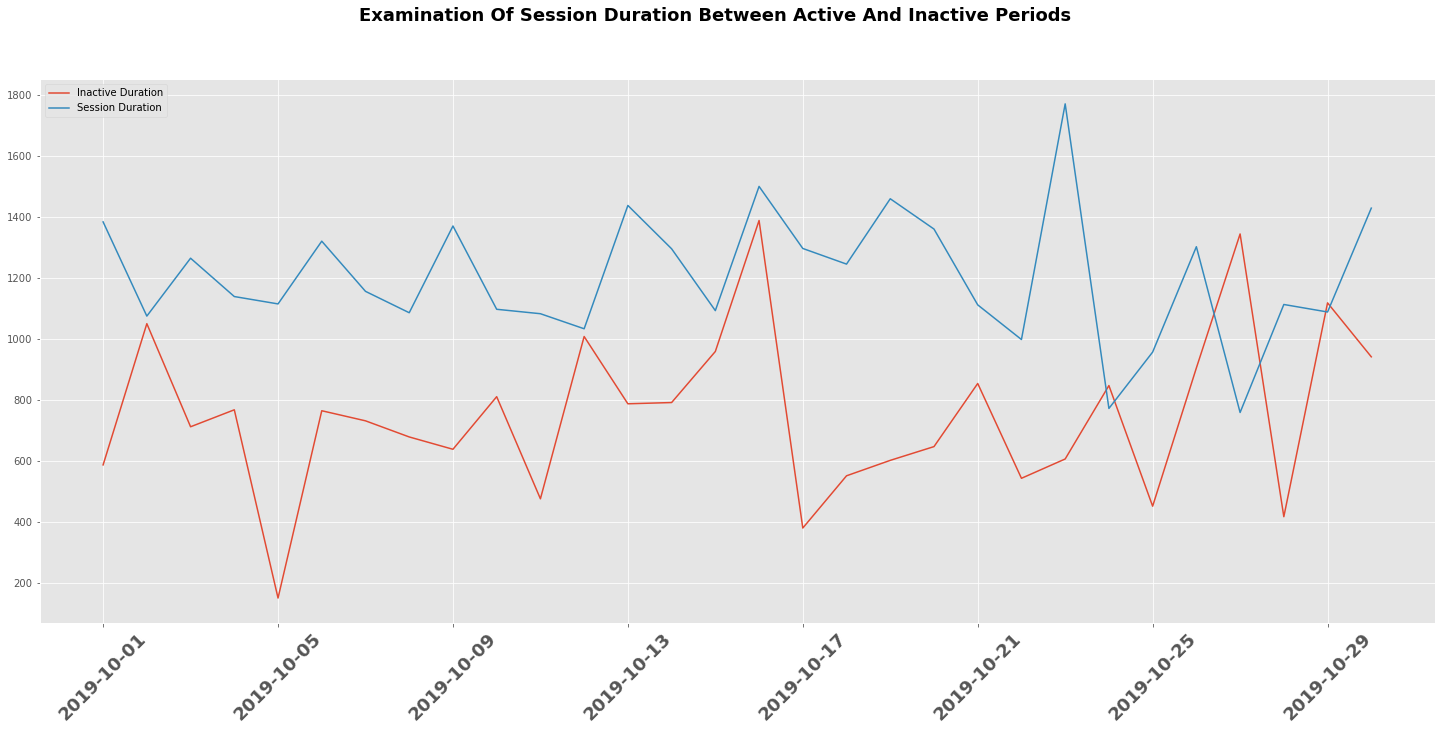

In [714]:
#Analyze inactive duration 
#df.groupby('login_date').sum().bugs_in_session

inactive = df.groupby('login_date').mean()
with plt.style.context('ggplot'):
    plt.figure(figsize=(25,10))
    plt.plot(inactive['inactive_duration'], label='Inactive Duration')
    plt.plot(inactive['session_duration'], label='Session Duration')
    plt.suptitle("Examination Of Session Duration Between Active And Inactive Periods",fontweight="bold",fontsize=18)
    plt.xticks(rotation=45,fontweight="bold",fontsize=18)
    plt.legend(loc=2)

# Examine what lead to an extended inactive session. 

## I decided to graph the bugs encountered which might lead to a user abandoning a session for a longer than normal time. 

## Notice: the large spike of bugs on Oct 25 - 26. The main conclusion here is that this spike of bugs resulted in more inactivity during the same time session. 

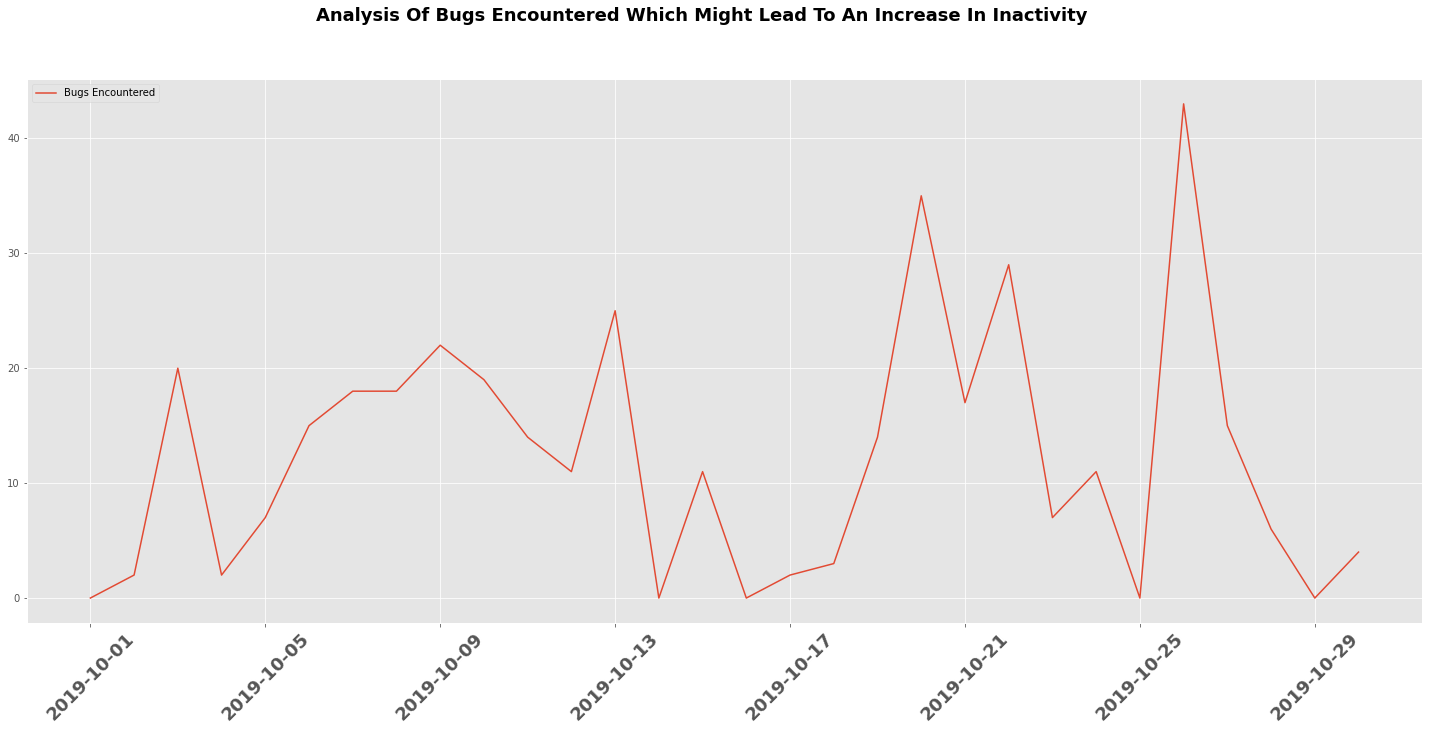

In [715]:
#Analyze the causes of an increase in inactive duration in terms of bugs encountered 

bugs = df.groupby('login_date').sum()
with plt.style.context('ggplot'):
    plt.figure(figsize=(25,10))
    plt.plot(bugs['bugs_in_session'], label='Bugs Encountered')
    plt.suptitle("Analysis Of Bugs Encountered Which Might Lead To An Increase In Inactivity",fontweight="bold",fontsize=18)
    plt.xticks(rotation=45,fontweight="bold",fontsize=18)
    plt.legend(loc=2)

# Examine what the top users are doing on the platform

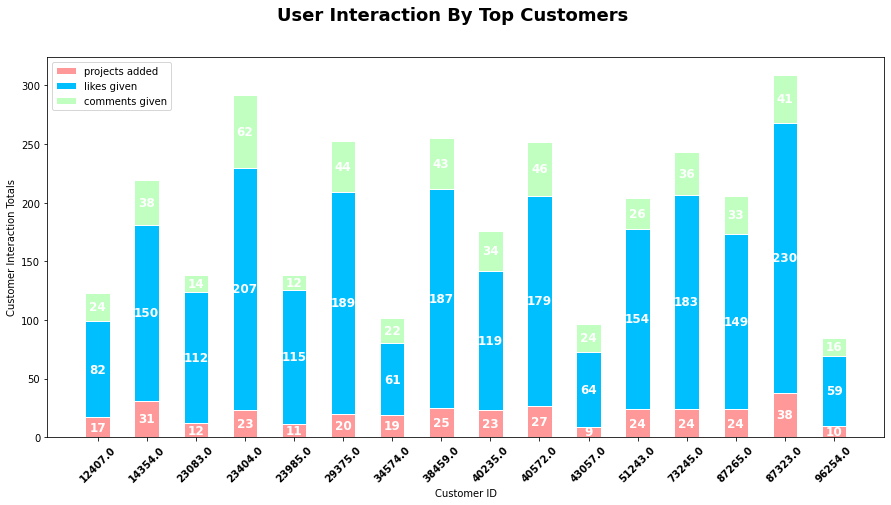

In [716]:
#What are top users doing on the platform? 

users = df.groupby(['customer_id']).sum()
top_users = users[users['session_duration']>users['session_duration'].mean()]

quarter = top_users.index
projects = top_users['session_projects_added']
likes =  top_users['session_likes_given']
comments = top_users['session_comments_given']
    
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
r = range(len(quarter))
barWidth = .50


plt.figure(figsize=(15,7))
plt.suptitle("User Interaction By Top Customers",fontweight="bold",fontsize=18)
ax1 = plt.bar(r, projects, color=colors[0], edgecolor='white', width=barWidth, label="projects added")
ax2 = plt.bar(r, likes, bottom=np.array(projects), color=colors[1], edgecolor='white', width=barWidth, label='likes given')
ax3 = plt.bar(r, comments, bottom=np.array(projects)+np.array(likes), color=colors[2], edgecolor='white', width=barWidth, label='comments given')
plt.legend()


plt.xticks(r, quarter, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel("Customer ID")
plt.ylabel("Customer Interaction Totals")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=12, fontweight="bold")

plt.show()

# Examine which days of the week bugs are normally occurring

## It seems that days in which there is a higher volume of usage leads to a higher number of bugs encountered. (As expected)


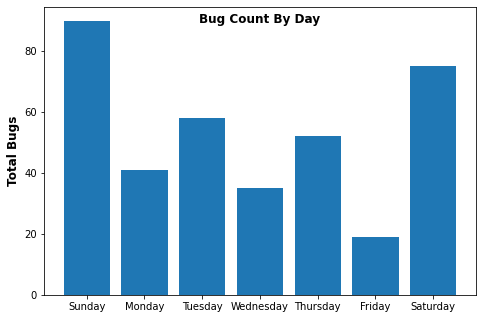

In [717]:
dailyInteraction = df.groupby(['day_of_week']).sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.suptitle("Bug Count By Day\n",fontweight="bold",fontsize=12)
days = dailyInteraction.index
value = dailyInteraction['bugs_in_session']
ax.bar(days,value)
plt.ylabel('Total Bugs',fontweight="bold",fontsize=12)
plt.show()

## Analyze the total number of users for October

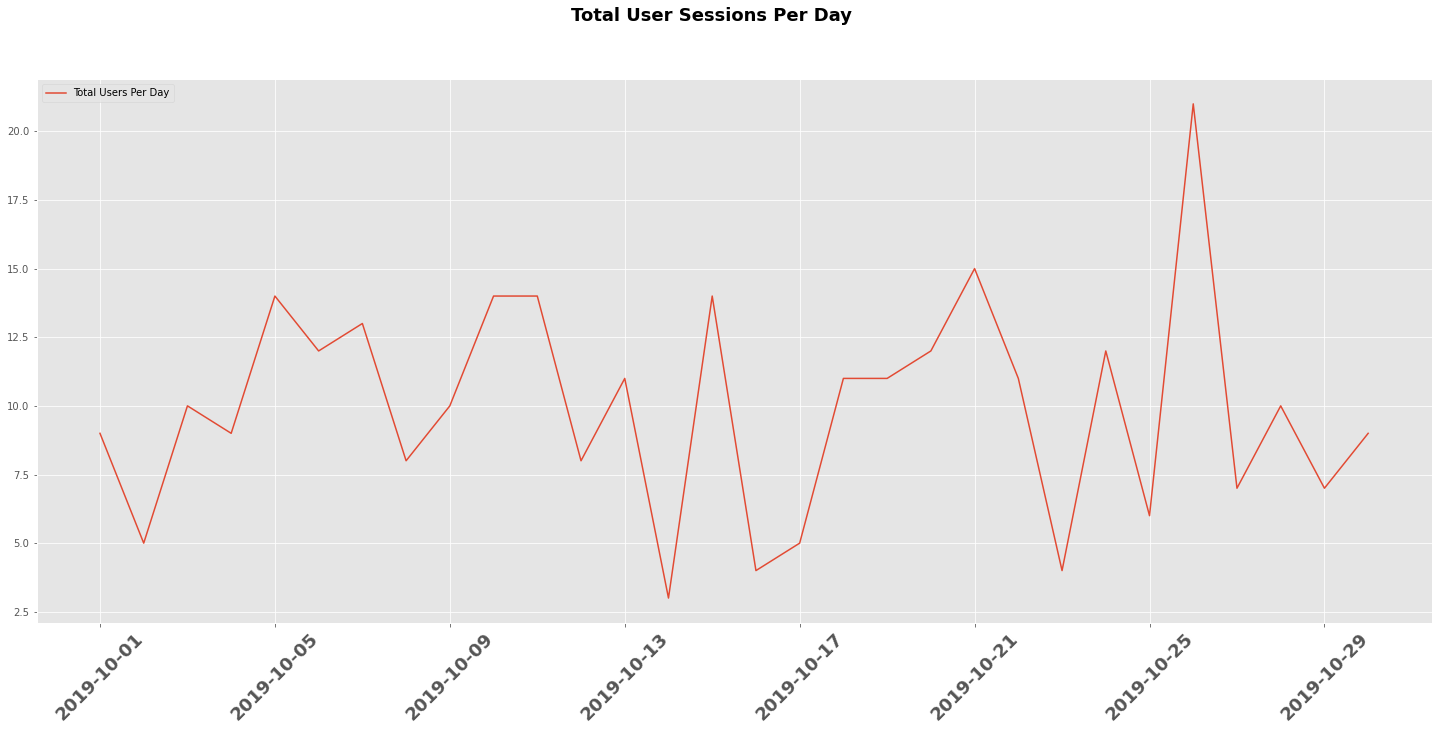

In [718]:
#Date Analysis
date = df.groupby(['login_date']).count()
with plt.style.context('ggplot'):
    plt.figure(figsize=(25,10))
    plt.plot(date['session_id'], label='Total Users Per Day')
    plt.suptitle("Total User Sessions Per Day",fontweight="bold",fontsize=18)
    plt.xticks(rotation=45,fontweight="bold",fontsize=18)
    plt.legend(loc=2)

## Final Conclusions

In [719]:
print("October 2019 Final Conclusions:\n")

print("Most frequent customer by id:\t\t", top_users.index[-2])
print("Highest User Interaction Day:\t\t", dailyInteraction.index[-1])
print("Longest Session Duration:\t\t", inactive['session_duration'].max())
print("Shortest Session Duration:\t\t", round(inactive['session_duration'].min()))
print("Longest Inactive Duration:\t\t", inactive['inactive_duration'].max())
print("Shortest Inactive Duration:\t\t", inactive['inactive_duration'].min())
print("Total Projects Added:\t\t\t", interaction['session_projects_added'].sum())
print("Total Likes Given:\t\t\t", interaction['session_likes_given'].sum())
print("Total Comments Given:\t\t\t", interaction['session_comments_given'].sum())
print("Total Bugs Found In Session:\t\t", bugs['bugs_in_session'].sum(),'\n')
print("Date With Most Active Users:", date[['session_id']].idxmax())
print("\nDate With Most Active Users:", date[['session_id']].idxmin())

October 2019 Final Conclusions:

Most frequent customer by id:		 87323.0
Highest User Interaction Day:		 Saturday
Longest Session Duration:		 1769.75
Shortest Session Duration:		 759.0
Longest Inactive Duration:		 1388.0
Shortest Inactive Duration:		 152.0
Total Projects Added:			 484.0
Total Likes Given:			 3127.0
Total Comments Given:			 720.0
Total Bugs Found In Session:		 370.0 

Date With Most Active Users: session_id   2019-10-26
dtype: datetime64[ns]

Date With Most Active Users: session_id   2019-10-14
dtype: datetime64[ns]
